# **주택가격 회귀 분석**

In [ ]:
import warnings

warnings.filterwarnings(action='ignore')

### **1. 데이터 수집**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

### **2. 데이터 준비 및 탐색**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
colab_path='/content/drive/'
file_path = colab_path+'MyDrive/DataScience/DataFile/boston_data.csv'

In [ ]:
boston_df = pd.read_csv(file_path)
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


* CRIM: 지역별 범죄 발생률
* zn: 25,000평방 피트를 초과하는 거주 지역 비율
* INDUS: 비상업 지역의 넓이 비율
* CHAS: 찰스강의 더비변수(1은 강의 경계, O은 경계 아님)
* NOX: 일산화질소 농도
* AGE: 1940년 이전에 건축된 주택 비율
* DIS: 5개 주요 고용센터까지 가중 거리
* RAD: 고속도로 접근 용이
* TAX: 10,000달러당 재산세 비율
* PTRATIO: 지역의 교수와 학생수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위계층비율
* PRICE(MEDV): 본인 소유 주택 가격의 중앙값(in $1000)

In [ ]:
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


### **3. 분석 모델 구축**

**1) X, Y 분할하기**

In [ ]:
# 정보 대강보기
# 각 값들의 차이가 크다 -> StandardScaler or MinMax
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [ ]:
# columns 대문자로 변경
boston_df.columns = boston_df.columns.str.upper()

In [ ]:
# 수치 자료
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  BLACK    404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [ ]:
# 행, 열 확인
boston_df.shape

(404, 14)

In [ ]:
# 중복 데이터 확인 -> 없음
boston_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
399    False
400    False
401    False
402    False
403    False
Length: 404, dtype: bool

In [ ]:
# 결측치 없음
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [ ]:
# 수행 해본 결과, 성능에 영향을 미치지 않음
# from sklearn.preprocessing import StandardScaler # 속성값 표준화
# scaled = StandardScaler()
# scaled_col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT']
# boston_df[scaled_col] = scaled.fit_transform(boston_df[scaled_col])
# boston_df.head()

In [ ]:
# 독립변수
X = boston_df.drop('MEDV', axis = 1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77


In [ ]:
# 종속변수
Y = boston_df['MEDV']
Y

0      21.7
1      19.6
2      20.3
3      15.4
4      20.5
       ... 
399    14.1
400    15.0
401    50.0
402    24.7
403    23.7
Name: MEDV, Length: 404, dtype: float64

**2) 훈련용 데이터와 평가용 데이터 분할하기**

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, train_size=0.8, random_state = 0)

In [ ]:
trainX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
394,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58
252,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57
313,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
75,4.54192,0.0,18.10,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79
64,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
192,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61
117,0.36920,0.0,9.90,0.0,0.544,6.567,87.3,3.6023,4.0,304.0,18.4,395.69,9.28
47,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02


In [ ]:
# 8:2로 분리
testX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
238,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
60,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78
230,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
134,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59
20,9.33889,0.0,18.10,0.0,0.679,6.380,95.6,1.9682,24.0,666.0,20.2,60.72,24.08
219,0.13642,0.0,10.59,0.0,0.489,5.891,22.3,3.9454,4.0,277.0,18.6,396.90,10.87
14,15.17720,0.0,18.10,0.0,0.740,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45


**3) 선형회귀분석 : 모델 생성**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()


**4) 선형회귀분석: 모델 훈련**

In [ ]:
lr.fit(trainX, trainY)

LinearRegression()

**5) 평가 데이터에 대한 예측 수행: 결과 예측 Y_predict**

In [ ]:
Y_predict = lr.predict(testX)

### **4. 결과 분석**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
Y_predict

array([14.38915539, 35.12993917, 16.08104693, 20.62983597, 18.08051689,
       22.26147103, 29.07244706,  7.49540208, 37.76561523, 34.48034132,
       24.27728996, 31.09688025, 24.36387944, 22.27750626, 20.76631096,
       32.87077574, 30.71813082, 16.94311765, 31.31762808, 22.37073483,
       25.21183939, 17.05360174, 22.08306195, 16.4261332 , 17.60940148,
       25.50152585, 13.7891078 , 22.89721328, 26.70845015, 22.22919691,
       12.59058144, 16.63238195, 21.89036145, 35.18793928, 31.40289389,
       27.44093974, 29.25635071, 15.14338057, 28.56576847, 38.01283054,
       21.46020235, 27.63546274, 14.78720307, 14.29476864, 24.3389689 ,
       21.38190119, 27.93388035, 19.40986539, 19.33048877, 18.69132092,
        8.07859611, 21.18279413, 22.72456056,  8.91158992, 21.21509327,
       28.37062458, 17.36108054, 42.7896588 , 13.56892504, 34.2406227 ,
        6.39307076, 18.18908518, 17.79519916, 27.36485064, 24.17806102,
       24.45579062, 32.71970637, 34.89280272, 17.90616304, 29.57

In [ ]:
testY

400    15.0
238    33.2
60     10.2
230    22.9
134    16.1
       ... 
68     17.1
20      9.5
219    22.6
14      8.7
346    33.1
Name: MEDV, Length: 81, dtype: float64

In [ ]:
mse = mean_squared_error(testY, Y_predict)

In [ ]:
mse

10.769143775943657

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

3.281637362041037

### **5. 회귀 분석 결과의 선형 회귀 그래프 시각화**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'BLACK', 'LSTAT', 'MEDV'],
      dtype='object')

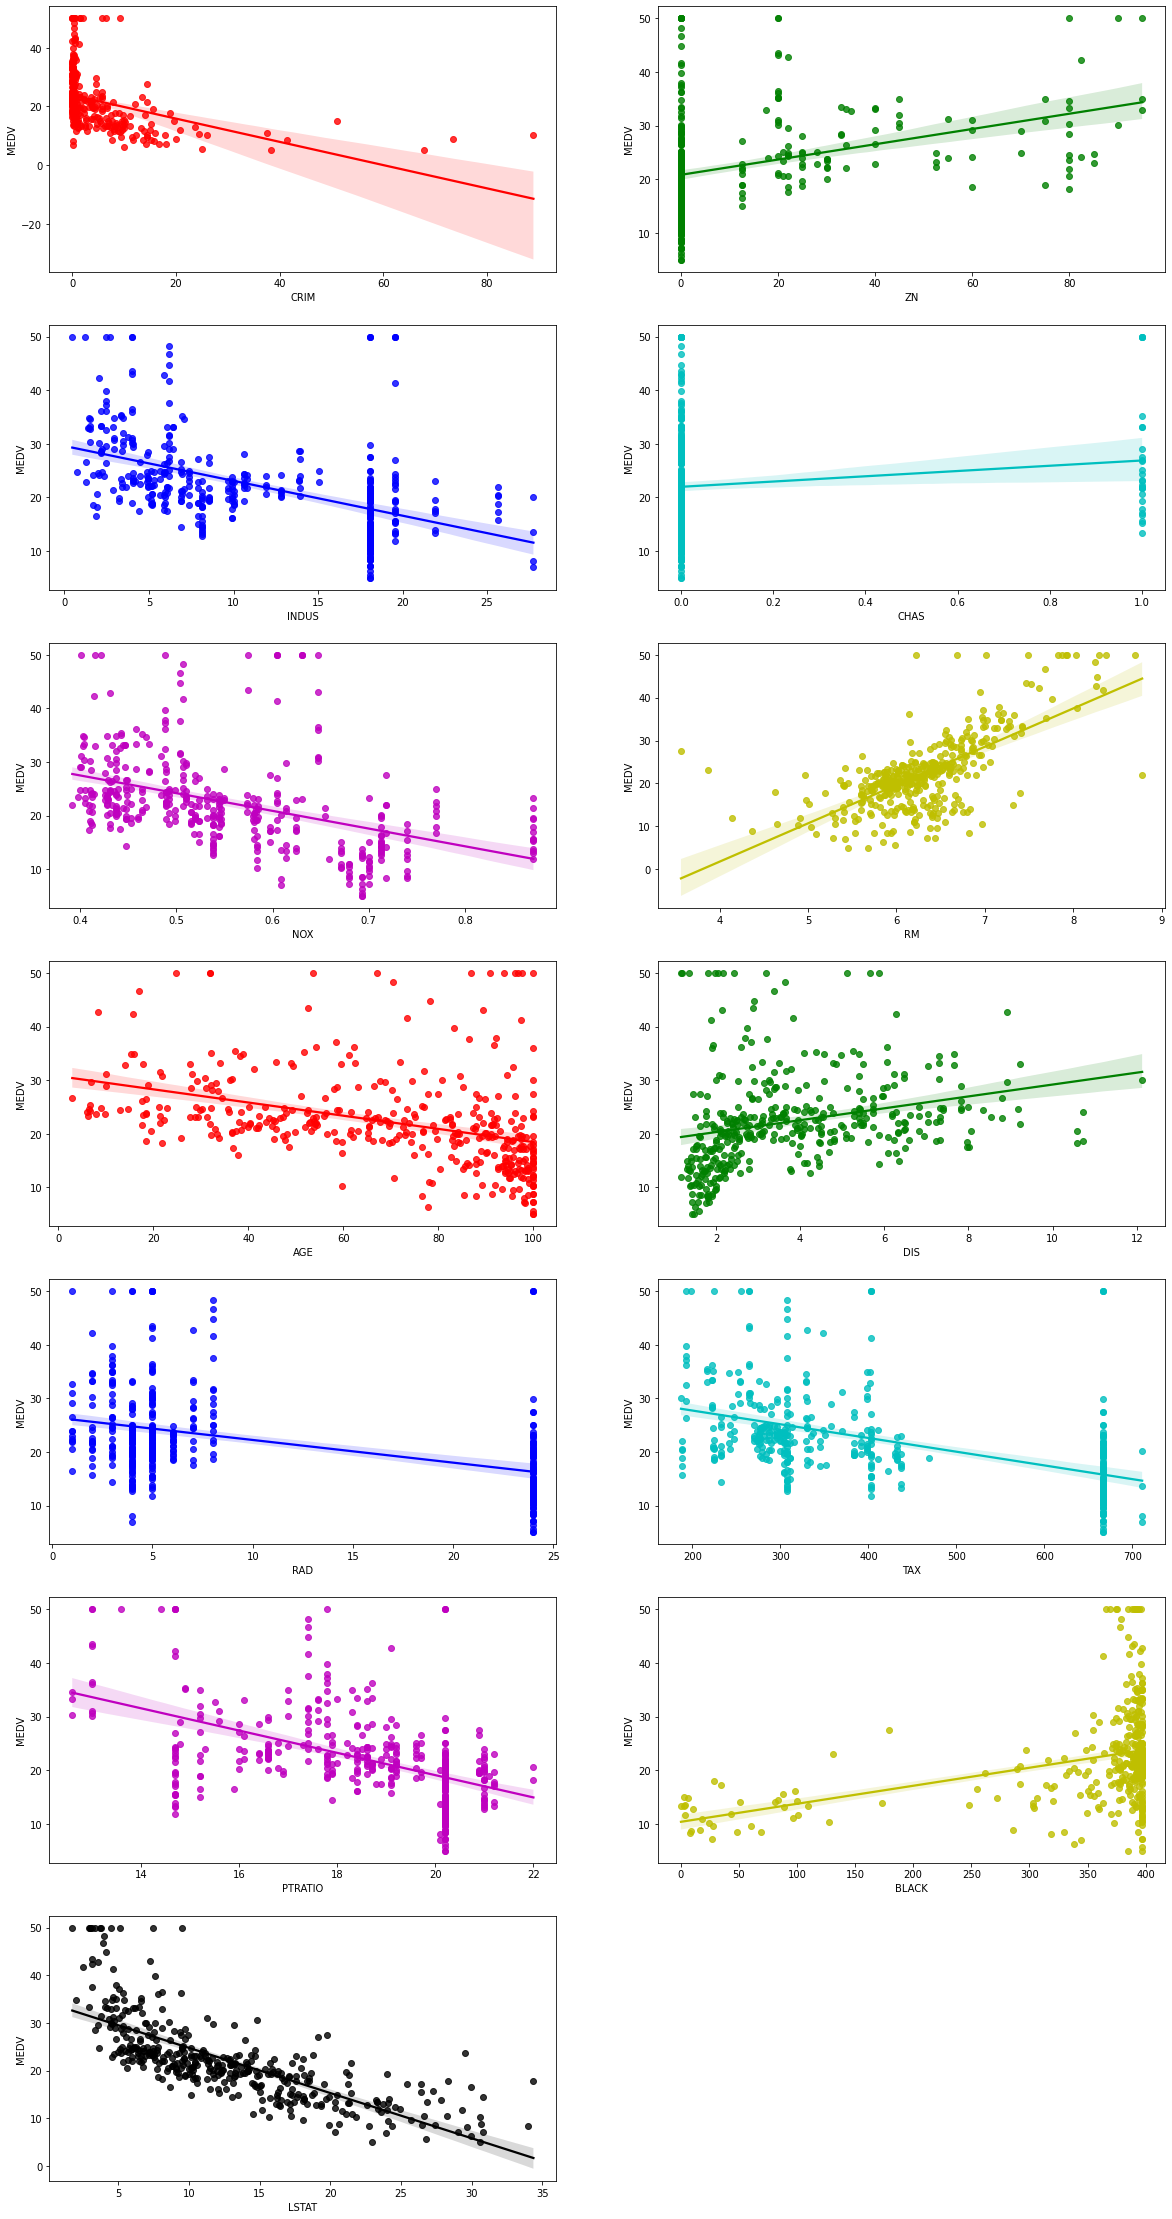

In [ ]:
plt.figure(figsize=(20, 40))
plt.title('Graph Between medv and others', fontsize = 20)
plt.subplot(7, 2, 1)
sns.regplot(x='CRIM', y='MEDV', data=boston_df, color='r')
plt.subplot(7, 2, 2)
sns.regplot(x='ZN', y='MEDV', data=boston_df, color='g')
plt.subplot(7, 2, 3)
sns.regplot(x='INDUS', y='MEDV', data=boston_df, color='b')
plt.subplot(7, 2, 4)
sns.regplot(x='CHAS', y='MEDV', data=boston_df, color='c')
plt.subplot(7, 2, 5)
sns.regplot(x='NOX', y='MEDV', data=boston_df, color='m')
plt.subplot(7, 2, 6)
sns.regplot(x='RM', y='MEDV', data=boston_df, color='y')
plt.subplot(7, 2, 7)
sns.regplot(x='AGE', y='MEDV', data=boston_df, color='r')
plt.subplot(7, 2, 8)
sns.regplot(x='DIS', y='MEDV', data=boston_df, color='g')
plt.subplot(7, 2, 9)
sns.regplot(x='RAD', y='MEDV', data=boston_df, color='b')
plt.subplot(7, 2, 10)
sns.regplot(x='TAX', y='MEDV', data=boston_df, color='c')
plt.subplot(7, 2, 11)
sns.regplot(x='PTRATIO', y='MEDV', data=boston_df, color='m')
plt.subplot(7, 2, 12)
sns.regplot(x='BLACK', y='MEDV', data=boston_df, color='y')
plt.subplot(7, 2, 13)
sns.regplot(x='LSTAT', y='MEDV', data=boston_df, color='k')